Ramen Sales Report


,Menu_Item,count,revenue,cogs,total_profit
0,vegetarian curry + king trumpet mushroom ramen,8824,86918.0,46802,52944.0
1,miso crab ramen,8890,78648.0,39324,53340.0
2,nagomi shoyu,9132,73260.0,33300,54792.0
3,shio ramen,9180,74184.0,33720,55080.0
4,truffle butter ramen,8982,94164.0,47082,62874.0
5,soft-shell miso crab ramen,9130,94388.0,47194,63910.0
6,tori paitan ramen,9156,88634.0,40908,64092.0
7,vegetarian spicy miso,9216,81864.0,34110,64512.0
8,spicy miso ramen,9238,81624.0,34010,64666.0
9,tonkotsu ramen,9288,88400.0,40800,65016.0


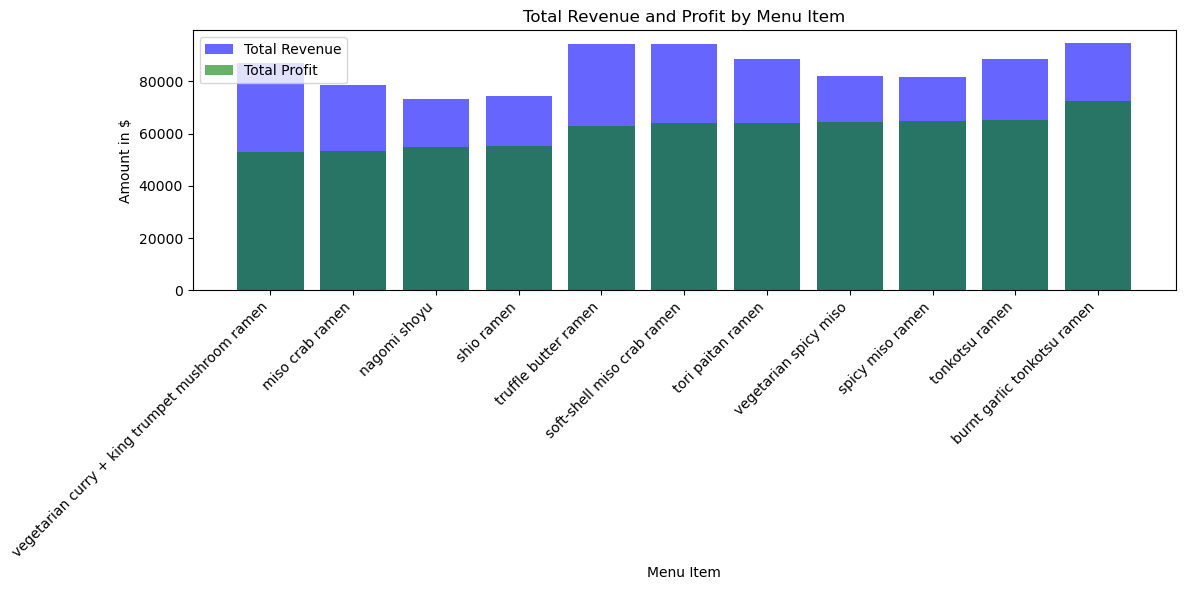

In [1]:
"""
PyRamen Analysis Tool

This Python module is designed to assist restaurant owners, particularly those running a ramen restaurant, 
in analyzing their sales performance. The tool processes data from two CSV files: 'menu_data.csv', 
which contains details about the menu items (including prices and costs), and 'sales_data.csv', 
which records individual sales transactions.

Key functionalities include:
- Merging sales data with menu item details to provide comprehensive insights.
- Calculating total quantity sold, total revenue, cost of goods sold (COGS), and profit for each menu item.
- Aggregating these metrics to generate a detailed performance report for each type of ramen.
- Presenting the data in an easy-to-understand format, including both tabular summaries and graphical visualizations using Pandas and Matplotlib.
- Outputting the final report to a CSV file for further analysis or record-keeping.

This tool aims to provide clear and actionable insights into menu item performance, helping restaurant 
owners make informed decisions about menu pricing, cost management, and potential adjustments to their menu offerings.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Read the Data using Pandas
menu_df = pd.read_csv('menu_data.csv')
sales_df = pd.read_csv('sales_data.csv')

# Part 2: Manipulate the Data
# Merge sales data with menu data


"""
Notes
------------------------------
- sales_df and menu_df are pandas DataFrames that hold your sales and menu data, respectively.
- The merge function is used to combine these two DataFrames into a single DataFrame called merged_df.
- left_on='Menu_Item' specifies the column in sales_df to merge on.
- right_on='item' specifies the corresponding column in menu_df to merge on.
- This operation joins rows from sales_df and menu_df where the values in the Menu_Item column from sales_df match values in the item column of menu_df. It’s similar to a SQL JOIN.
------------------------------
"""

merged_df = sales_df.merge(menu_df, left_on='Menu_Item', right_on='item')

# Calculate profit for each sale
merged_df['profit'] = (merged_df['price'] - merged_df['cost']) * merged_df['Quantity']

"""
Notes
------------------------------
- groupby('Menu_Item'): This groups the merged DataFrame by the Menu_Item column. It means that the subsequent operations will be performed on each group of Menu_Item separately.
- agg(...): The agg function is used to apply different aggregate functions to columns in the grouped data.
- count=('Quantity', 'sum'): Calculates the total quantity sold for each menu item. It sums up the Quantity for each group of Menu_Item.
- revenue=('price', 'sum'): Calculates the total revenue for each item. It sums up the price for each Menu_Item.
- cogs=('cost', 'sum'): Calculates the total cost of goods sold (COGS) for each item. It sums up the cost for each Menu_Item.
- total_profit=('profit', 'sum'): Calculates the total profit for each menu item by summing up the profit.
- .reset_index(): This is used to reset the index of the resulting DataFrame. Without it, Menu_Item would become the index of report_df; with it, Menu_Item remains a column, and the DataFrame gets a new integer index.
------------------------------
"""

# Aggregate data for report
report_df = merged_df.groupby('Menu_Item').agg(
    count=('Quantity', 'sum'),
    revenue=('price', 'sum'),
    cogs=('cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# After calculating the aggregated data for the report
report_df = report_df.sort_values(by='total_profit', ascending=True).reset_index(drop=True)

# Display the report as a DataFrame
print("Ramen Sales Report")
display(report_df)

# Part 3: Data Visualization with Matplotlib
plt.figure(figsize=(12, 6))

"""
Notes
------------------------------
- plt.bar creates a bar chart.
- report_df['Menu_Item'] specifies the x-values, which are the names of the menu items.
- report_df['revenue'] specifies the heights of the bars, representing the total revenue for each menu item.
- label='Total Revenue' assigns a label to this set of bars, which will be used in the legend.
- alpha=0.6 sets the transparency of the bars, with 1 being fully opaque and 0 being fully transparent. Here, 0.6 means the bars are 60% opaque.
- color='blue' sets the color of the bars for the total revenue to blue.
------------------------------
"""

# Plotting total revenue and total profit for each item
plt.bar(report_df['Menu_Item'], report_df['revenue'], label='Total Revenue', alpha=0.6, color='blue')
plt.bar(report_df['Menu_Item'], report_df['total_profit'], label='Total Profit', alpha=0.6, color='green')

plt.xlabel('Menu Item')
plt.ylabel('Amount in $')
plt.title('Total Revenue and Profit by Menu Item')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Write out the report to a text file using Pandas
report_df.to_csv('ramen_report_pandas.csv', index=False)